In [91]:
import numpy as np
import copy
import math
import matplotlib.pyplot as plt
# mathplotlib inline

# 创建数据集

一个样本中有两个高斯分布，均值不同，方差相同；
实例：从一个学校里随机抽取学生，抽取n个，其中包含a个女学生，b个男学生。

In [92]:
# n 样本数量 ，k 几个高斯分布，sigma：方差，real_mu 包含两个分布的真实期望

def create_data(n,k,real_mu,sigma):
    X = np.zeros((n,1))
    for i in range(0,n):
#   随机抽取 男女生
        if np.random.random()>0.5:
            X[i][0] = np.random.normal()*sigma + real_mu[0]
        else:
            X[i][0] = np.random.normal()*sigma + real_mu[1]
    return X

# 高斯分布

In [93]:

def gaussian_dist(x,mu,sigma):
    exponent = np.exp(-np.power((x-mu),2)/(2*np.power(sigma,2)))
    result = 1/np.power(2*np.pi*sigma**2 , 1/2) *exponent
    return result

# Expectation

固定$\theta$ ,优化条件期望

简单而言：已知 $\theta$ ,求条件期望，即在某个样本结果出现的条件下，是男生或者女生的概率

In [94]:
def e_step(X,mu,sigma,expectations):
    length = X.shape[0]
    k = mu.shape[0]

    for i in range(0,length):
        denominator = 0;
        for j in range(0,k):
            denominator += gaussian_dist(X[i][0],mu[j],sigma)
        
        for j in range(0,k):      
            numberator = gaussian_dist(X[i][0],mu[j],sigma)         
            expectations[i][j]= numberator / denominator
            
    return expectations

# Maximization

已知条件期望，求解$\theta$在此次迭代中的最大值

In [95]:
#  这种方法更直观，
# def m_step(X,mu,sigma,expectations):
#     n = X.shape[0]
#     k = mu.shape[0] 
#     for i in range(0,k):   
#         numberator = 0
#         denominator = 0
#         for j in range(0,n):
#             numberator += expectations[j,i]*X[j,0]
#             denominator += expectations[j,i]
        
#         mu[i] = numberator/denominator
    
#     return mu

In [96]:
# 向量法，简单高效
def m_step(X,mu,sigma,expectations):
    numbers = np.transpose(X).dot(expectations)
    denominator= np.sum(expectations,axis=0)

    result = numbers/denominator
#     result是1*2的矩阵，
# 我们需要返回一个一维向量，包含两个分量而已。
    mu[0] = result[0][0]
    mu[1] = result[0][1]
    return mu

# 训练

In [97]:
def train(X,sigma,expectations,iteration,epsilon):
    mu = np.random.random(2)
    for i in range(0,iteration):
        # deepcopy 使得两个值相互不影响
        old_mu = copy.deepcopy(mu)
        # E步：求出条件期望
        expectations = e_step(X,mu,sigma,expectations)
        
        print(i,mu)
        # M步，利用E步的期望，求最大的theta（）
        mu = m_step(X,mu,sigma,expectations)
        # 如果两次迭代的差值小于阈值，则训练结束，也可以认为找到局部最优值，
        if np.abs(np.sum(old_mu) - np.sum(mu)) < epsilon:
            break

0 [0.71085143 0.97453594]
1 [168.60550916 169.62356611]
2 [167.44608098 171.32745846]
3 [163.31669663 175.570302  ]
4 [160.18984499 179.48883559]
5 [160.04240354 180.32256705]
6 [160.14223833 180.53002579]
7 [160.19102044 180.60482685]
8 [160.21080304 180.63380363]
9 [160.21861444 180.64513455]
10 [160.22168114 180.64957042]
11 [160.22288306 180.65130723]
12 [160.22335384 180.65198726]
13 [160.22353819 180.65225352]
14 [160.22361038 180.65235778]
15 [160.22363865 180.6523986 ]
16 [160.22364971 180.65241458]
17 [160.22365405 180.65242084]


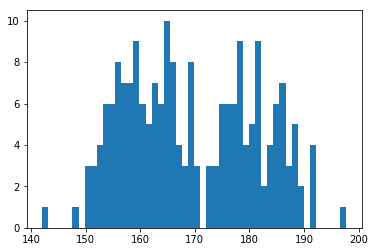

In [98]:
# 200个抽样样本，（男女生集合）
n=200
k=2
# 真实期望
real_mu = np.array([180,160])
sigma=6
iteration=1000
epsilon=0.00001
expectations = np.zeros((n,k))
X = create_data(n,k,real_mu,sigma)
train(X,sigma,expectations,iteration, epsilon)
plt.hist(X,50)
plt.show()